<a href="https://colab.research.google.com/github/soumita20/MDS-Daekin/blob/main/Endterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Question 1.1

In [ ]:
df = pd.read_json('assignment2data.json')

In [ ]:
df

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
0,0,0,46,N,2,0,0,7,2,17,...,0,4,1,50,0,1,0,35,0,0.3364
1,0,0,24,Y,0,0,12,2,0,13,...,0,3,4,26,0,2,0,16,0,0.1404
2,0,0,147,Y,3,1,10,33,2,71,...,0,3,17,152,0,2,1,96,0,0.1851
3,0,0,0,Y,0,0,0,0,1,2,...,0,0,0,2,0,1,0,1,0,0.0000
4,0,0,1,Y,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46274,0,0,36,N,2,0,1,7,1,18,...,0,4,8,40,0,2,0,17,0,0.0091
46275,0,13,13,Y,2,0,0,5,2,19,...,0,2,1,19,0,2,1,5,0,0.1210
46276,0,0,2,N,0,0,0,0,0,2,...,0,0,0,2,0,1,1,2,0,0.1500
46277,0,0,15,Y,0,0,7,0,0,14,...,0,0,0,15,0,2,0,13,0,0.1824


In [ ]:
print('Number of rows in dataset is',df.shape[0],'\nNumber of columns in dataset is',df.shape[1])

Number of rows in dataset is 46279 
Number of columns in dataset is 43


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 249


In [ ]:
#Remove Duplicate Data
df.drop_duplicates(inplace=True) 

In [ ]:
print('Number of rows after removing duplicate rows in dataset is',df.shape[0],'\nNumber of columns after removing duplicate rows in dataset is',df.shape[1])

Number of rows after removing duplicate rows in dataset is 46030 
Number of columns after removing duplicate rows in dataset is 43


Question 1.2

In [ ]:
def missingdf(df):
    # Percentage of missing values
    percent_missing  = 100 * df.isnull().sum() / len(df)
    # Create result df
    result_df = pd.DataFrame({'column_name': df.columns,
                              'percent_missing': percent_missing})
    #reset the index of new dataframe
    result_df.reset_index(drop=True, inplace=True)
    #sort df with percent missing
    result_df.sort_values('percent_missing', inplace=True,ascending=False)
    return result_df
    
missingdf(df)    
    
    

,column_name,percent_missing
30,coupon_discount_applied,22.168151
0,sacc_items,0.000000
32,ios_orders,0.000000
24,shipping_addresses,0.000000
25,redpen_discount_used,0.000000
26,mftw_items,0.000000
27,days_since_first_order,0.000000
28,unisex_items,0.000000
29,home_orders,0.000000
31,desktop_orders,0.000000


Question 1.3

In [ ]:
def column_list(df):
    categorical_columns=[]
    numerical_columns=[]
    for i in df.columns:
        if df[i].dtype == 'object':
            categorical_columns.append(i)
        else:
             numerical_columns.append(i)
            
    return numerical_columns,categorical_columns
 
column_list(df)    

(['sacc_items',
  'work_orders',
  'female_items',
  'male_items',
  'afterpay_payments',
  'msite_orders',
  'wftw_items',
  'mapp_items',
  'orders',
  'cc_payments',
  'curvy_items',
  'paypal_payments',
  'macc_items',
  'cancels',
  'revenue',
  'returns',
  'other_collection_orders',
  'parcelpoint_orders',
  'android_orders',
  'days_since_last_order',
  'vouchers',
  'average_discount_used',
  'shipping_addresses',
  'redpen_discount_used',
  'mftw_items',
  'days_since_first_order',
  'unisex_items',
  'home_orders',
  'coupon_discount_applied',
  'desktop_orders',
  'ios_orders',
  'apple_payments',
  'wspt_items',
  'wacc_items',
  'items',
  'mspt_items',
  'devices',
  'different_addresses',
  'wapp_items',
  'other_device_orders',
  'average_discount_onoffer'],
 ['is_newsletter_subscriber', 'customer_id'])

In [ ]:
def column_list(df):
    numCols = df.select_dtypes("number").columns
    catCols = df.select_dtypes("object").columns
    numCols= list(set(numCols))
    catCols= list(set(catCols))
    return numCols, catCols

In [ ]:
column_list(df)

(['redpen_discount_used',
  'days_since_first_order',
  'mftw_items',
  'wspt_items',
  'apple_payments',
  'male_items',
  'afterpay_payments',
  'wftw_items',
  'paypal_payments',
  'curvy_items',
  'macc_items',
  'mapp_items',
  'wacc_items',
  'unisex_items',
  'days_since_last_order',
  'coupon_discount_applied',
  'different_addresses',
  'home_orders',
  'average_discount_onoffer',
  'android_orders',
  'other_collection_orders',
  'shipping_addresses',
  'mspt_items',
  'parcelpoint_orders',
  'wapp_items',
  'returns',
  'items',
  'vouchers',
  'msite_orders',
  'female_items',
  'ios_orders',
  'cancels',
  'average_discount_used',
  'cc_payments',
  'devices',
  'orders',
  'other_device_orders',
  'desktop_orders',
  'sacc_items',
  'work_orders',
  'revenue'],
 ['customer_id', 'is_newsletter_subscriber'])

In [ ]:
df[df.select_dtypes("number").columns].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
sacc_items,46030.0,0.087899,0.539604,0.0,0.0000,0.0000,0.00000,29.00
work_orders,46030.0,0.240995,1.565071,0.0,0.0000,0.0000,0.00000,84.00
female_items,46030.0,6.472800,17.830007,0.0,0.0000,2.0000,5.00000,537.00
male_items,46030.0,1.720660,5.468827,0.0,0.0000,0.0000,1.00000,273.00
afterpay_payments,46030.0,0.053595,0.225220,0.0,0.0000,0.0000,0.00000,1.00
msite_orders,46030.0,0.978557,2.859161,0.0,0.0000,0.0000,1.00000,172.00
wftw_items,46030.0,1.633826,4.088452,0.0,0.0000,0.0000,2.00000,261.00
mapp_items,46030.0,0.926613,3.689578,0.0,0.0000,0.0000,0.00000,151.00
orders,46030.0,4.111362,8.122569,1.0,1.0000,2.0000,4.00000,665.00
cc_payments,46030.0,0.642972,0.479128,0.0,0.0000,1.0000,1.00000,1.00


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sacc_items,46030.0,NaN,NaN,NaN,0.087899,0.539604,0.0,0.0,0.0,0.0,29.0
work_orders,46030.0,NaN,NaN,NaN,0.240995,1.565071,0.0,0.0,0.0,0.0,84.0
female_items,46030.0,NaN,NaN,NaN,6.4728,17.830007,0.0,0.0,2.0,5.0,537.0
is_newsletter_subscriber,46030,2,N,27203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
male_items,46030.0,NaN,NaN,NaN,1.72066,5.468827,0.0,0.0,0.0,1.0,273.0
afterpay_payments,46030.0,NaN,NaN,NaN,0.053595,0.22522,0.0,0.0,0.0,0.0,1.0
msite_orders,46030.0,NaN,NaN,NaN,0.978557,2.859161,0.0,0.0,0.0,1.0,172.0
wftw_items,46030.0,NaN,NaN,NaN,1.633826,4.088452,0.0,0.0,0.0,2.0,261.0
mapp_items,46030.0,NaN,NaN,NaN,0.926613,3.689578,0.0,0.0,0.0,0.0,151.0
orders,46030.0,NaN,NaN,NaN,4.111362,8.122569,1.0,1.0,2.0,4.0,665.0


<AxesSubplot:>

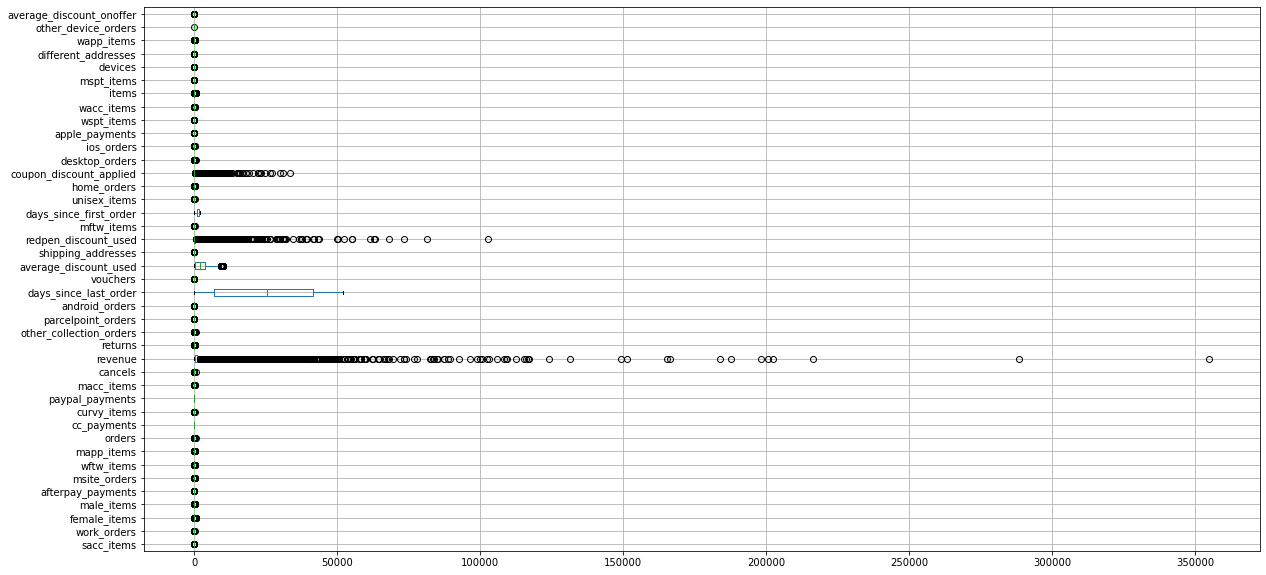

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot(vert=False)

In [ ]:
#corrupted column .. since no days is huge

In [ ]:
df['days_since_last_order']

0        15672
1          528
2          144
3        49200
4        49272
         ...  
46274     1200
46275     2976
46276    23952
46277    30888
46278     2688
Name: days_since_last_order, Length: 46030, dtype: int64

In [ ]:
#years
df['days_since_last_order']/365

0         42.936986
1          1.446575
2          0.394521
3        134.794521
4        134.991781
            ...    
46274      3.287671
46275      8.153425
46276     65.621918
46277     84.624658
46278      7.364384
Name: days_since_last_order, Length: 46030, dtype: float64

In [ ]:
# need to find out one more column which is corrupted

In [ ]:
#df.to_excel("output.xlsx")

Question 1.5

In [ ]:
df[df.female_items>0].cc_payments.value_counts(normalize=True)*100

1    65.481287
0    34.518713
Name: cc_payments, dtype: float64

In [ ]:
df[df.cc_payments==1].revenue.sum()

50189328.55

In [ ]:
df.groupby(['cc_payments']).sum()

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,curvy_items,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
cc_payments,,,,,,,,,,,,,,,,,,,,,
0,979,1352,54171,18951,1146,11397,16749,9149,40201,612,...,8,3143,5583,77223,1408,19374,938,26817,0,3429.2047
1,3067,9741,243772,60251,1321,33646,58456,33503,149045,1290,...,18,14291,20834,317887,3942,39433,4420,148133,2,5324.3660


Question 1.6

In [ ]:
df['is_newsletter_subscriber'].replace(['Y', 'N'],[1,0], inplace=True)

In [ ]:
print(df['is_newsletter_subscriber'].value_counts())

NameError: ignored

Question 1.7

In [ ]:
df['female_item_rate']=df['female_items']/df['items']
df['male_item_rate']=df['male_items']/df['items']
df['unisex_items_rate']=df['unisex_items']/df['items']

In [ ]:
df[(df.female_item_rate==1) & (df.male_item_rate==1)& (df.orders>4.1)]

,sacc_items,work_orders,female_items,is_newsletter_subscriber,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,...,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer,female_item_rate,male_item_rate,unisex_items_rate


Write a code find out how many rows (customers) could have the value female_item_rate == 1
and the value male_item_rate == 1 and the value orders > 4.11

In [ ]:
df[(df.female_items==1)].male_item_rate.value_counts()

0.000000    9460
0.500000     502
0.666667     265
0.750000     114
0.333333      66
            ... 
0.968750       1
0.843750       1
0.583333       1
0.375000       1
0.785714       1
Name: male_item_rate, Length: 87, dtype: int64

Question 1.8

In [ ]:
grouped_df = df.groupby("is_newsletter_subscriber")

In [ ]:
grouped_df.orders.mean()

is_newsletter_subscriber
0    2.484175
1    6.462474
Name: orders, dtype: float64

In [ ]:
grouped_df.orders.max()

is_newsletter_subscriber
0    665
1    234
Name: orders, dtype: int64

In [ ]:
grouped_df.orders.median()

is_newsletter_subscriber
0    1.0
1    3.0
Name: orders, dtype: float64

Part 2

In [ ]:
def sum_digits(n):
    r=0
    while n:
        r,n=r+n%10,n//10
    return r

def check_studentid(studentid_list):

    studentid=sum(studentid_list)
    x=sum_digits(studentid)
    if x%2==0:
        print('versionII')
    else:
        print('versionI')
        
check_studentid([223019446,223019633,223019965])

versionI


Question 2.1

In [44]:
#import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from statsmodels.tsa.seasonal import STL
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast
from math import sqrt

Defined the function moving_avg

In [ ]:
#Reference: https://www.geeksforgeeks.org/how-to-calculate-moving-averages-in-python/
#define a function moving_avg using numpy
def moving_avg(series,n):
  i=0
  data_numpyArr = series.to_numpy()
  moving_average = []
  for i in range(0,n-1):
    moving_average.append(np.nan)
  #Loop through the data_numpyArr array and consider every window of size n
  while i < len(data_numpyArr) - n + 1:
    window_average = round(np.sum(data_numpyArr[i:i+n])/n,2)
    #Store the average of current window in moving average list
    moving_average.append(window_average)
    #Shift window to right by 1 position
    i+=1
  return moving_average

In [45]:
#read the data
tourism_df = pd.read_csv("https://raw.githubusercontent.com/tulip-lab/open-data/master/HK2012-2018/Australia.csv")

In [46]:
#shape of the dataset
tourism_df.shape

(84, 98)

The dataset has 84 rows and 97 columns

In [47]:
#Let's take a look at the dataset
tourism_df.head()

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,bus hong kong,taxi hong kong,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre
0,2012-01,60116,94,63,13,89,71,100,89,10,...,56,30,100,17,81,94,52,87,89,40
1,2012-02,43982,90,53,26,75,40,79,75,10,...,24,20,65,26,67,89,44,51,75,40
2,2012-03,57736,97,49,12,79,31,80,79,5,...,52,45,59,48,75,46,48,28,79,0
3,2012-04,58640,87,59,51,89,33,72,89,13,...,40,10,63,50,39,72,78,74,89,0
4,2012-05,46312,81,49,57,95,38,72,95,11,...,45,86,47,38,35,39,59,66,95,0


In [48]:
#let's take a look at the columns of the dataset
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 98 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   date                                        84 non-null     object
 1   arrival                                     84 non-null     int64 
 2   Hong kong                                   84 non-null     int64 
 3   Hong kong dollar                            84 non-null     int64 
 4   Sheung Wan                                  84 non-null     int64 
 5   Tai Ping Shan Street                        84 non-null     int64 
 6   Hong kong central                           84 non-null     int64 
 7   Hong Kong Disneyland                        84 non-null     int64 
 8   hong kong dollar to rmb                     84 non-null     int64 
 9   hkd to usd                                  84 non-null     int64 
 10  Hong Kong cuisine           

In [49]:
tourism_df.head()

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,bus hong kong,taxi hong kong,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre
0,2012-01,60116,94,63,13,89,71,100,89,10,...,56,30,100,17,81,94,52,87,89,40
1,2012-02,43982,90,53,26,75,40,79,75,10,...,24,20,65,26,67,89,44,51,75,40
2,2012-03,57736,97,49,12,79,31,80,79,5,...,52,45,59,48,75,46,48,28,79,0
3,2012-04,58640,87,59,51,89,33,72,89,13,...,40,10,63,50,39,72,78,74,89,0
4,2012-05,46312,81,49,57,95,38,72,95,11,...,45,86,47,38,35,39,59,66,95,0


Let us check for missing values in the dataset before proceeding forward

In [50]:
#Let us check for missing values in the dataset
tourism_df.isnull().any(axis=1).sum()

0

This dataset does not have any missing values

In [51]:
#Let us set the index to date type since we are working on time series data
tourism_df.index = pd.to_datetime(tourism_df.date,format='%Y-%m')
tourism_df.head()

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,bus hong kong,taxi hong kong,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012-01,60116,94,63,13,89,71,100,89,10,...,56,30,100,17,81,94,52,87,89,40
2012-02-01,2012-02,43982,90,53,26,75,40,79,75,10,...,24,20,65,26,67,89,44,51,75,40
2012-03-01,2012-03,57736,97,49,12,79,31,80,79,5,...,52,45,59,48,75,46,48,28,79,0
2012-04-01,2012-04,58640,87,59,51,89,33,72,89,13,...,40,10,63,50,39,72,78,74,89,0
2012-05-01,2012-05,46312,81,49,57,95,38,72,95,11,...,45,86,47,38,35,39,59,66,95,0


Let us look at the current arrival data per year

Text(0, 0.5, 'Arrivals')

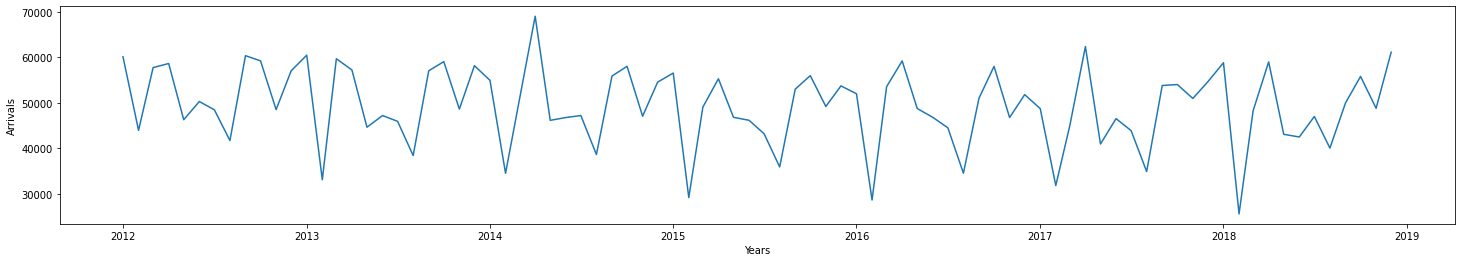

In [52]:
tourism_df_arrival = tourism_df["arrival"]
plt.figure(figsize=(25, 4))
plt.plot(tourism_df_arrival)
plt.xlabel('Years')
plt.ylabel('Arrivals')

From the above graph we can make out that during the 1st few months of every year, maybe January or February, the number of arrivals show a decreasing trend and it has continuously been decreasing during that period over the years

Also, number of arrivals go up every year during April/May/June, which means that summer season invites a lot of tourists in Hong Kong

Towards the middle of the year, number of arrivals are mostly stable, with the number increasing towards the winter season, maybe October/November/December, i.e. onset of the winter season. Although the numbers increase they are not as huge as that in summer.

So, we can see a trend as well as seasonality in the data from this graph, but we are unable to make out the exact drop and rise in number of arrivals when plotted over the years. Let us plot the arrivals with respect to each month, so that we can understand the trend and seasonality in the data a little better.

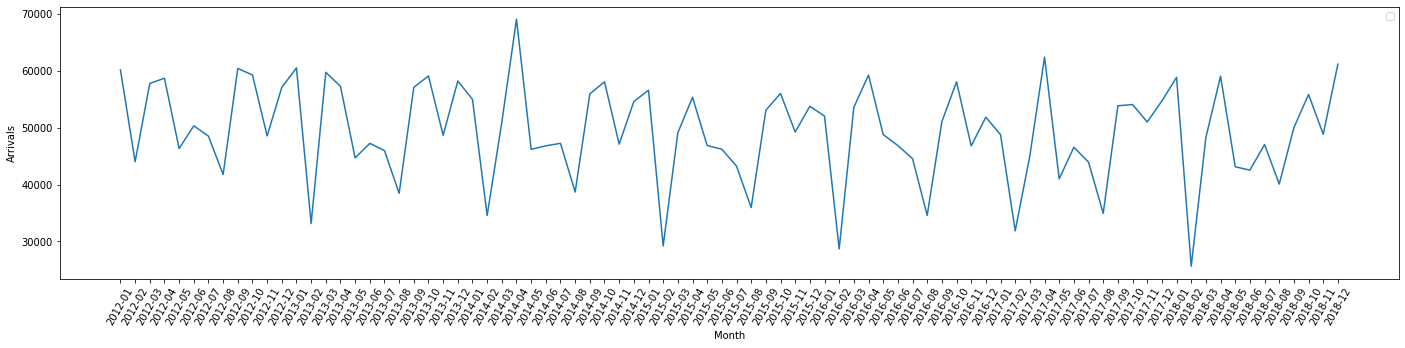

In [53]:
#defining the plot size
plt.rcParams["figure.figsize"] = (24,5)
plt.plot(tourism_df["date"],tourism_df["arrival"])
plt.legend(loc="best")
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Arrivals')
plt.show()

From the above graph, now we have a much clearer picture and can also identify the trend as well as seasonality in the arrival data from 2012 to 2018 much more clearly.

There were maximum arrivals in March 2014 and we can see a sharp drop in the number of arrivals in October 2018.

We can also see that there is a trend in the number of arrivals from June to August every year. Probable reason could be due to summer season in Hong Kong.

Number of arrivals are at a high during the months starting September, with a short dip in October-November every year, followed by a small rise again in December and January.

There is a sharp decrease in the number of arrivals in month of February every year and it keeps on decreasing over every year in February.

Thus we can see that this data is highly seasonal and it also follows a trend.

Let us now plot the seasonality of the arrival data over a period of 12 months

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre,Year,Month
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012-01,60116,94,63,13,89,71,100,89,10,...,100,17,81,94,52,87,89,40,2012,January
2012-02-01,2012-02,43982,90,53,26,75,40,79,75,10,...,65,26,67,89,44,51,75,40,2012,February
2012-03-01,2012-03,57736,97,49,12,79,31,80,79,5,...,59,48,75,46,48,28,79,0,2012,March
2012-04-01,2012-04,58640,87,59,51,89,33,72,89,13,...,63,50,39,72,78,74,89,0,2012,April
2012-05-01,2012-05,46312,81,49,57,95,38,72,95,11,...,47,38,35,39,59,66,95,0,2012,May


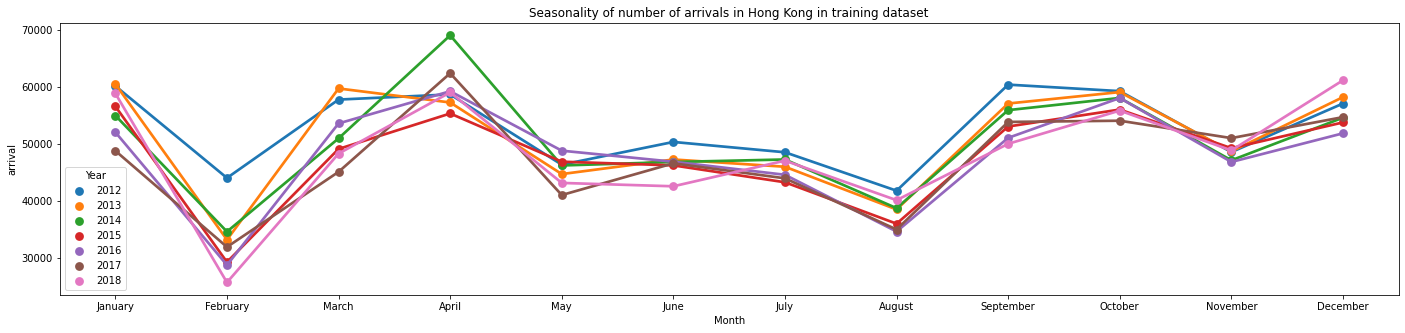

In [54]:
#At first, let us make a copy of the original dataframe
tourism_df_seasonality = tourism_df.copy()
#Create 2 columns year and month to get the corresponding year and month of the data
tourism_df_seasonality["Year"] = pd.DatetimeIndex(tourism_df_seasonality.index).year
tourism_df_seasonality["Month"] = pd.DatetimeIndex(tourism_df_seasonality.index).month_name()
#Let us now create a line plot to understand the seasonality of the data for all months
plt.rcParams["figure.figsize"] = (24,5)
plt.title("Seasonality of number of arrivals in Hong Kong in training dataset")
sns.pointplot(x="Month",y="arrival", hue="Year", data = tourism_df_seasonality)
tourism_df_seasonality.head()

From the seasonality graph it is very clear that the number of arrivals in April is the highest and in February it is the lowest, followed by August.



Let us now divide the data between training set and test set and start working on the decomposition of the training set to separate out the trend, seasonality and irregular components like residuals and noise in the data.


####Train data: from 01-2012 to 12-2017
####Test data: 01-2018 to 06-2018


In [55]:
#We will use the "tourism_df_seasonality" dataset since it has additional columns "Year" and "Month"
#defining the train date range
tourism_df_train = tourism_df_seasonality.loc["01-01-2012":"31-12-2017"]
tourism_df_train.head()

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre,Year,Month
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012-01,60116,94,63,13,89,71,100,89,10,...,100,17,81,94,52,87,89,40,2012,January
2012-02-01,2012-02,43982,90,53,26,75,40,79,75,10,...,65,26,67,89,44,51,75,40,2012,February
2012-03-01,2012-03,57736,97,49,12,79,31,80,79,5,...,59,48,75,46,48,28,79,0,2012,March
2012-04-01,2012-04,58640,87,59,51,89,33,72,89,13,...,63,50,39,72,78,74,89,0,2012,April
2012-05-01,2012-05,46312,81,49,57,95,38,72,95,11,...,47,38,35,39,59,66,95,0,2012,May


In [56]:
#defining the test dataset
tourism_df_test = tourism_df_seasonality.loc["01-01-2018":"30-06-2018"]
tourism_df_test.head()

,date,arrival,Hong kong,Hong kong dollar,Sheung Wan,Tai Ping Shan Street,Hong kong central,Hong Kong Disneyland,hong kong dollar to rmb,hkd to usd,...,holiday hong kong,festival hong kong,hot hong kong,temperature hong kong,bar hong kong,air asia Hong Kong,Yum cha,Hong Kong Convention and Exhibition Centre,Year,Month
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018-01,58811,71,72,68,90,67,78,90,51,...,48,40,47,60,51,12,90,0,2018,January
2018-02-01,2018-02,25649,67,61,41,85,29,49,85,66,...,40,21,25,55,60,13,85,25,2018,February
2018-03-01,2018-03,48259,70,80,15,80,42,66,80,37,...,34,29,30,72,86,17,80,0,2018,March
2018-04-01,2018-04,58997,74,76,38,89,36,69,89,38,...,45,20,39,52,47,18,89,0,2018,April
2018-05-01,2018-05,43110,65,54,43,87,45,62,87,36,...,62,53,22,52,60,20,87,0,2018,May


In [57]:
#Check the maximum and minimum values of the training and test data
train_min_date = tourism_df_train.date.min()
train_max_date = tourism_df_train.date.max()
test_min_date = tourism_df_test.date.min()
test_max_date = tourism_df_test.date.max()
print('Min Date of training dataset: ',train_min_date, "Max Date of training dataset: ",train_max_date)
print('Min Date of test dataset: ',test_min_date, "Max Date of test dataset: ",test_max_date)

Min Date of training dataset:  2012-01 Max Date of training dataset:  2017-12
Min Date of test dataset:  2018-01 Max Date of test dataset:  2018-06


In [58]:
tourism_df_train.shape, tourism_df_test.shape

((72, 100), (6, 100))

More than 90% of the data is being used for training and only 10% of the data will be used for test as per the dates provided

We will now perform STL(Season Trend LOESS) decomposition on the training data

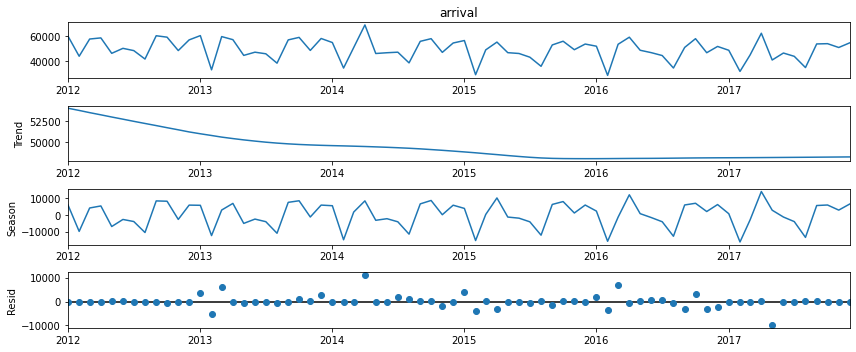

In [59]:
#Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html
#We will be using STL decomposition for our dataset.
#Seasonal is deafult to 7 for the STL algorithm. This parameter is used to fit the data seasonally and see how the trend is changing when this value changes.
#It is an additive model and would be good to implement in this data because have seen that the number of arrivals do not amplify over time.
stl = STL(tourism_df_train["arrival"],seasonal=7,robust="True")
res = stl.fit()
plt.rcParams["figure.figsize"] = (12,5)
#plt.title("Decomposition of number of arrivals over the years")
fig=res.plot()

From the graphs we can understand the below:


Trend: There is clearly a decreasing trend in the number of customers arriving to Hong Kong for tourism from 2012 to 2017. The trend is also stable in 2016 and 2017


Seasonality: It is clearly visible that the data is seasonal in nature. If we look at the graph for the training data, we can see that there has been a gradual rise in the number of arrivals during the summer months, April to June and it has increased more over passing years. We can see that the summer of 2017 had more number of arrivals than in any other year. There is a sharp decline in the number of arrivals in the start of the year towards end of January and whole of February, after which it increases very steeply in the summer months. We can also see a small drop in the number of customers towards the end of the year in October, after which it again rises steeply till end of December and start of January.

Irregular components like noise: If we look at the bottom most graph, we can see that there is a small percent of noise in the data in 2013, 2014 and 2017. There are some irregularities in the data mostly during February every year, when there is a sharp fall in the number of customers





In [60]:
#Let us check the datatype of the trend object
type(res.trend)

pandas.core.series.Series

In [61]:
trend = pd.DataFrame(res.trend)
trend["forecast"] = moving_avg(trend.trend,2)
trend.head()

,trend,forecast
date,,
2012-01-01,54116.718480,NaN
2012-02-01,53846.005172,53981.36
2012-03-01,53576.182561,53711.09
2012-04-01,53307.520271,53441.85
2012-05-01,53040.321054,53173.92


In [62]:
rmse = round(np.sqrt(np.square(np.subtract(trend.trend,trend.forecast)).mean()),2)
print("RMSE of training dataset is: ",rmse)

RMSE of training dataset is:  64.26


In [80]:
test_trend=pd.DataFrame(tourism_df_test.arrival)
#test_trend = pd.DataFrame(res.trend[0:6])
#test_trend["forecast"] = moving_avg(test_trend,1)
#test_trend["forecast"] = moving_avg(test_trend.trend,2)
test_trend["forecast"] = moving_avg(test_trend.arrival,2)

In [81]:
test_trend.head()

,arrival,forecast
date,,
2018-01-01,58811,NaN
2018-02-01,25649,42230.0
2018-03-01,48259,36954.0
2018-04-01,58997,53628.0
2018-05-01,43110,51053.5


In [83]:
#rmse_test = round(np.sqrt(np.square(np.subtract(test_trend.trend,test_trend.forecast)).mean()),2)
rmse_test = round(np.sqrt(np.square(np.subtract(test_trend.arrival,test_trend.forecast)).mean()),2)
print("RMSE value for test dataset is: ",rmse_test)

RMSE value for test dataset is:  9947.31


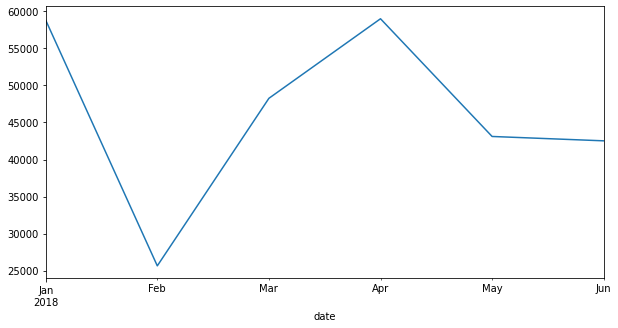

In [74]:
tourism_df_test.arrival.plot(figsize=(10,5))

We can see that the RMSE value for the test dataset is 9947.31 whereas the training RMSE value of 64.26, which is more than the training RMSE value.

Let us take a look at the test data to see if we can find any kind of trend. 

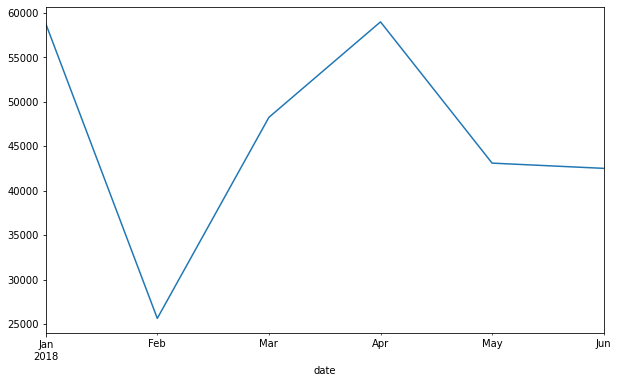

In [75]:
tourism_df_test.arrival.plot(figsize=(10,6))

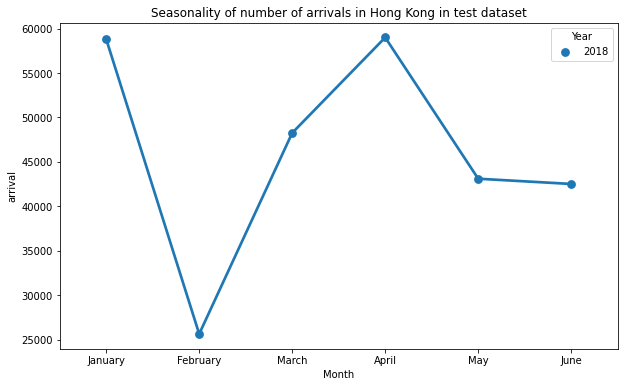

In [76]:
tourism_df_test["Year"] = pd.DatetimeIndex(tourism_df_test.index).year
tourism_df_test["Month"] = pd.DatetimeIndex(tourism_df_test.index).month_name()
#Let us now create a line plot to understand the seasonality of the data for all months
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Seasonality of number of arrivals in Hong Kong in test dataset")
sns.pointplot(x="Month",y="arrival", hue="Year", data = tourism_df_test)
#tourism_df_test.head()

In [ ]:
tourism_df_test.shape

(6, 100)

We can clearly see that there is no clear trend for the test data. Since there are only 6 data points, it might be difficult to find any trend.

Question 2.2

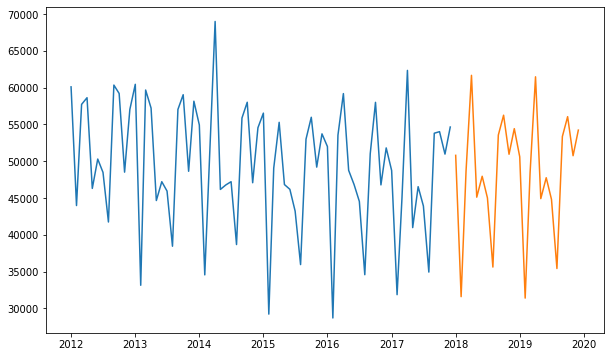

In [ ]:
#Let us apply ARIMA on our dataset
stlf = STLForecast(tourism_df_train["arrival"], ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(tourism_df_train["arrival"])
plt.plot(forecast)
plt.show()

In [ ]:
print(stlf_res.summary())

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                   72
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -671.448
Date:                Sun, 09 Oct 2022   AIC                           1348.895
Time:                        07:31:41   BIC                           1355.683
Sample:                    01-01-2012   HQIC                          1351.595
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -16.4907    342.996     -0.048      0.962    -688.750     655.768
ar.L1         -0.1267      0.022     -5.639      0.000      -0.171      -0.083
sigma2      9.448e+06      0.033    2.9e+08      0.0

In [ ]:
rmse_arima = round(sqrt(mean_squared_error(tourism_df_test['arrival'],forecast[:6])),2)
print("RMSE value for ARIMA model is: ",rmse_arima)

RMSE value for ARIMA model is:  4838.94
